# Data Analyst Competition 2023

Team : **Doa Ibu**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv("/content/drive/MyDrive/DataTrain_Preliminary.csv", sep=';')

In [5]:
pd.set_option('display.max_columns', 200)
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type_of_attack
0,0,tcp,private,SH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,176,1,0.01,0.94,0.95,0,0.95,1,0,0,nmap
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,*,0,0,0,0,0,0,0,144,5,1,1,0,0,*,*,0,255,5,0.02,0.08,0.00,0,1.00,1,0,0,neptune
2,0,tcp,http,SF,285,3623,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,15,0,0,0,0,1,0,*,115,228,1.00,0.00,0.01,*,0.00,0,0,0,normal
3,0,tcp,http,SF,232,584,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,6,255,1.00,0.00,0.17,*,0.00,0,0,0,normal
4,1,tcp,smtp,SF,1080,327,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,1,0,1,202,154,0.58,0.02,0.00,*,0.00,0,0,0,normal
5,0,tcp,discard,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,274,18,1,1,0,0,*,*,0,255,18,0.07,0.05,0.00,0,1.00,1,0,0,neptune
6,0,udp,domain_u,SF,43,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,200,0,0,0,0,1,0,*,255,254,1.00,0.01,0.01,0,0.00,0,0,0,normal
7,0,tcp,exec,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,149,25,1,1,0,0,*,*,0,255,25,0.10,0.05,0.00,0,1.00,1,0,0,neptune
8,0,tcp,http,SF,284,614,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,7,0,0,0,0,1,0,0,10,255,1.00,0.00,0.10,*,0.00,0,0,0,normal
9,0,tcp,http,SF,292,644,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,52,52,0,0,0,0,1,0,0,81,255,1.00,0.00,0.01,*,0.00,0,0,0,normal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112446 entries, 0 to 112445
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     112446 non-null  object 
 1   protocol_type                111778 non-null  object 
 2   service                      111426 non-null  object 
 3   flag                         111593 non-null  object 
 4   src_bytes                    112446 non-null  object 
 5   dst_bytes                    112446 non-null  object 
 6   land                         112446 non-null  object 
 7   wrong_fragment               112446 non-null  object 
 8   urgent                       112446 non-null  object 
 9   hot                          112446 non-null  object 
 10  num_failed_logins            112446 non-null  object 
 11  logged_in                    112446 non-null  object 
 12  num_compromised              112446 non-null  object 
 13 

In [7]:
df.type_of_attack.value_counts()

normal                      60538
neptune                     37142
ipsweep                      3254
satan                        3248
portsweep                    2687
smurf                        2394
Denial of Service Attack     1861
nmap                         1322
Name: type_of_attack, dtype: int64

## Identifikasi Type of Attack

1. **Normal**: "Normal" dalam konteks keamanan jaringan tidak merujuk kepada serangan, melainkan aktivitas jaringan yang tidak mencurigakan atau aktivitas yang normal dari pengguna jaringan yang sah.
2. **Neptune**: Neptune adalah nama umum untuk berbagai jenis serangan yang menghasilkan penggunaan yang berlebihan dari sumber daya jaringan dengan mengirimkan permintaan yang tidak sah secara berulang-ulang. Ini dapat menyebabkan penurunan kinerja atau penolakan layanan.
3. **Ipsweep**: Ipsweep adalah serangan di mana penyerang mencoba untuk menemukan alamat IP yang valid dalam jaringan. Ini dapat menjadi langkah awal untuk serangan yang lebih luas.
4. **Satan**: SATAN (Security Administrator Tool for Analyzing Networks) adalah alat pemindaian jaringan yang dirancang untuk mengidentifikasi kerentanannya dalam sistem dan perangkat di jaringan. Tujuan dari pemindaian ini adalah membantu administrator jaringan untuk meningkatkan keamanan mereka dengan mengidentifikasi dan memperbaiki kerentanannya.
5. **Portscan (Portsweep)**: Portsweep adalah jenis serangan di mana penyerang mencoba untuk memindai atau menguji beberapa port pada sejumlah besar perangkat dalam jaringan untuk menemukan port yang terbuka. Ini bisa menjadi tindakan persiapan untuk serangan berikutnya.
6. **Smurf**: Serangan Smurf adalah serangan amplifikasi yang memanfaatkan protokol Internet Control Message Protocol (ICMP). Penyerang mengirimkan permintaan ICMP dengan alamat IP sumber palsu ke jaringan yang memiliki banyak host, dan host-host tersebut membalas permintaan tersebut kepada alamat IP sumber yang sebenarnya. Ini dapat membanjiri jaringan dengan lalu lintas ICMP yang tidak diinginkan.
7. **Denial of Service (DoS) Attack**: Serangan Denial of Service (DoS) bertujuan untuk membuat sumber daya komputer atau jaringan tidak tersedia untuk pengguna yang sah dengan mengalirkan lalu lintas yang sangat besar atau mengeksploitasi kerentanannya pada sistem yang diserang.
8. **Nmap** (Network Mapper): Nmap adalah sebuah alat pemindaian jaringan yang digunakan untuk mengekplorasi dan mengidentifikasi perangkat yang terhubung ke jaringan. Ini dapat digunakan untuk pemetaan jaringan, penemuan port terbuka, sistem operasi, dan lebih banyak informasi yang berguna.

## Data Cleaning

### Replace Data

In [8]:
for kolom in df.columns:
    nilai_unik = df[kolom].unique()
    print(f'====={kolom}=====:')
    print(nilai_unik)

=====duration=====:
['0' '1' '3' ... '6000' '2588' '6457']
=====protocol_type=====:
['tcp' 'udp' 'icmp' nan]
=====service=====:
['private' 'http' 'smtp' 'discard' 'domain_u' 'exec' 'uucp_path' 'efs'
 'whois' 'other' nan 'shell' 'eco_i' 'ftp_data' 'courier' 'vmnet' 'telnet'
 'domain' 'ecr_i' 'imap4' 'finger' 'sunrpc' 'Z39_50' 'daytime'
 'netbios_ssn' 'kshell' 'time' 'mtp' 'login' 'supdup' 'klogin' 'link'
 'auth' 'ftp' 'gopher' 'urp_i' 'nnsp' 'name' 'netbios_dgm' 'iso_tsap'
 'echo' 'hostnames' 'ctf' 'http_443' 'csnet_ns' 'ldap' 'netstat' 'systat'
 'nntp' 'ssh' 'netbios_ns' 'uucp' 'rje' 'IRC' 'ntp_u' 'bgp' 'sql_net'
 'X11' 'pop_2' 'remote_job' 'pop_3' 'printer' 'urh_i' 'aol' 'red_i'
 'tim_i' 'http_8001' 'harvest' 'tftp_u' 'pm_dump' 'http_2784']
=====flag=====:
['SH' 'S0' 'SF' 'REJ' 'RSTR' 'S1' nan 'RSTO' 'RSTOS0' 'S3' 'OTH' 'S2']
=====src_bytes=====:
['0' '285' '232' ... '39908' '1527' '11747']
=====dst_bytes=====:
['0' '3623' '584' ... '6523' '194672' '3029']
=====land=====:
['0' '*' '99

Terdapat beberapa nilai yang aneh sehingga harus mengubah nilai tersebut menjadi missing value, diantaranya :
1. #NA
2. '*'
3. 99999
4. (Blank)

In [9]:
# replace menjadi missing value
df.replace('*', np.nan, inplace=True)
df.replace('99999', np.nan, inplace=True)

### Change Data Type

In [10]:
# data numerik
df_num=df[['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
           'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
           'num_outbound_cmds', 'count', 'srv_count','dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate']].astype(float)

In [11]:
# data kategorik
df_cat=df.drop(df_num, axis=1)

In [12]:
# gabung data
df=pd.concat([df_cat, df_num], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112446 entries, 0 to 112445
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                111778 non-null  object 
 1   service                      111426 non-null  object 
 2   flag                         111593 non-null  object 
 3   land                         112038 non-null  object 
 4   logged_in                    112276 non-null  object 
 5   root_shell                   112130 non-null  object 
 6   su_attempted                 112172 non-null  object 
 7   is_host_login                112370 non-null  object 
 8   is_guest_login               112018 non-null  object 
 9   serror_rate                  107729 non-null  object 
 10  srv_serror_rate              109570 non-null  object 
 11  rerror_rate                  108527 non-null  object 
 12  srv_rerror_rate              110614 non-null  object 
 13 

memilih fitur yang sekiranya terdapat hubungan dengan label

### Handle Missing Value

In [13]:
df.isnull().sum()

protocol_type                    668
service                         1020
flag                             853
land                             408
logged_in                        170
root_shell                       316
su_attempted                     274
is_host_login                     76
is_guest_login                   428
serror_rate                     4717
srv_serror_rate                 2876
rerror_rate                     3919
srv_rerror_rate                 1832
same_srv_rate                  42430
diff_srv_rate                  42242
srv_diff_host_rate             18379
dst_host_srv_diff_host_rate    34559
dst_host_srv_serror_rate        5852
dst_host_rerror_rate           11427
dst_host_srv_rerror_rate        5867
type_of_attack                     0
duration                         920
src_bytes                       1048
dst_bytes                        728
wrong_fragment                   523
urgent                           368
hot                              918
n

In [14]:
# menghapus kolom yang bernilai hanya 0 dan memiliki missing value banyak
df=df.drop(columns=['num_outbound_cmds', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                    'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate'], axis=1)
df.shape

(112446, 36)

In [15]:
df=df.dropna(axis=0)

In [16]:
df=df.reset_index()

### Data Duplicated

In [17]:
df.duplicated().sum()

0

## Data Preparation

In [18]:
df_num=df[['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
           'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
           'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate', 'count', 'srv_count', 'dst_host_serror_rate']]
df_cat=df.drop(df_num, axis=1)
df_cat=df_cat.drop(columns=['index'], axis=1)

### One-Hot Encoding

In [19]:
df_cat

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,type_of_attack
0,tcp,private,SH,0,0,0,0,0,0,1,1,0,0,1,0,nmap
1,tcp,http,SF,0,1,0,0,0,0,0,0,0,0,0,0,normal
2,tcp,http,SF,0,1,0,0,0,0,0,0,0,0,0,0,normal
3,tcp,smtp,SF,0,1,0,0,0,0,0,0,0,0,0,0,normal
4,tcp,discard,S0,0,0,0,0,0,0,1,1,0,0,1,0,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82198,tcp,http,SF,0,1,0,0,0,0,0,0,0,0,0,0,normal
82199,tcp,ssh,S0,0,0,0,0,0,0,1,1,0,0,1,0,neptune
82200,tcp,smtp,SF,0,1,0,0,0,0,0,0,0,0,0,0,normal
82201,tcp,http,SF,0,1,0,0,0,0,0,0,0,0,0,0,normal


In [20]:
df_onehot=df_cat.drop(columns=['type_of_attack'], axis=1)
df_onehot=pd.get_dummies(df_onehot, drop_first=True)
df_onehot=df_onehot.replace({False:0, True:1})
df_onehot

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land_1,logged_in_1,root_shell_1,su_attempted_1,su_attempted_2,is_guest_login_1,serror_rate_1,srv_serror_rate_1,rerror_rate_1,srv_rerror_rate_1,dst_host_srv_serror_rate_1,dst_host_srv_rerror_rate_1
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82198,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
82199,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
82200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
82201,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [21]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82203 entries, 0 to 82202
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   protocol_type_tcp           82203 non-null  uint8
 1   protocol_type_udp           82203 non-null  uint8
 2   service_X11                 82203 non-null  uint8
 3   service_Z39_50              82203 non-null  uint8
 4   service_auth                82203 non-null  uint8
 5   service_bgp                 82203 non-null  uint8
 6   service_courier             82203 non-null  uint8
 7   service_csnet_ns            82203 non-null  uint8
 8   service_ctf                 82203 non-null  uint8
 9   service_daytime             82203 non-null  uint8
 10  service_discard             82203 non-null  uint8
 11  service_domain              82203 non-null  uint8
 12  service_domain_u            82203 non-null  uint8
 13  service_echo                82203 non-null  uint8
 14  servic

In [22]:
# gabung data
df_model=pd.concat([df_onehot, df_num], axis=1)
df_model.shape

(82203, 109)

### Normalized

In [23]:
scaler = MinMaxScaler()
df_norm=scaler.fit_transform(df_num)
df_norm=pd.DataFrame(df_norm, columns=df_num.columns)

In [24]:
df_norm

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,count,srv_count,dst_host_serror_rate
0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.690196,0.003922,1.000010e-07,9.400094e-06,9.500095e-06,0.001957,0.001957,0.00001
1,0.000000,2.065271e-07,2.765781e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450980,0.894118,1.000010e-05,0.000000e+00,1.000010e-07,0.027397,0.029354,0.00000
2,0.000000,1.681203e-07,4.458228e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023529,1.000000,1.000010e-05,0.000000e+00,1.700017e-06,0.001957,0.001957,0.00000
3,0.000023,7.826292e-07,2.496302e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.792157,0.603922,5.800058e-06,2.000020e-07,0.000000e+00,0.001957,0.003914,0.00000
4,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.070588,7.000070e-07,5.000050e-07,0.000000e+00,0.536204,0.035225,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82198,0.000000,2.550791e-07,5.817072e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843,1.000000,1.000010e-05,0.000000e+00,5.000050e-06,0.003914,0.003914,0.00000
82199,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.011765,1.000010e-07,9.000090e-07,0.000000e+00,0.013699,0.005871,0.00001
82200,0.000117,9.978522e-07,2.503936e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.698039,0.458824,6.600066e-06,3.000030e-07,1.000010e-07,0.001957,0.001957,0.00000
82201,0.000000,2.630504e-07,5.504080e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000010e-05,0.000000e+00,0.000000e+00,0.066536,0.068493,0.00000


## EDA

### Outlier

<Axes: >

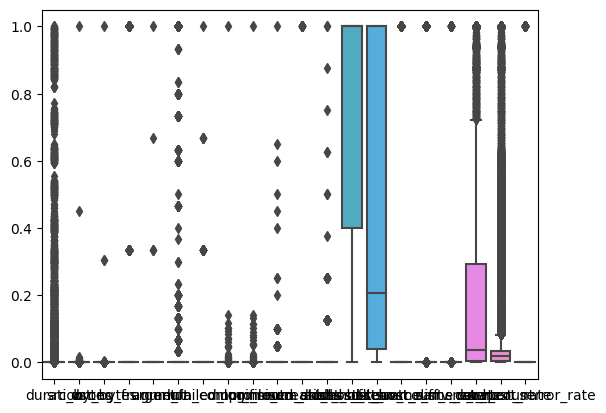

In [25]:
sns.boxplot(df_norm)

In [27]:
# Z-Score
numeric_cols = [col for col in df_num.columns.tolist()]
for i in numeric_cols:
    upper_limit = df_norm[i].mean() + 3*df_norm[i].std()
    lower_limit = df_norm[i].mean() - 3*df_norm[i].std()

    df_norm[i] = np.where(
        df_norm[i]>upper_limit,
        upper_limit,
        np.where(
            df_norm[i]<lower_limit,
            lower_limit,
            df_norm[i]
        )
    )

<Axes: >

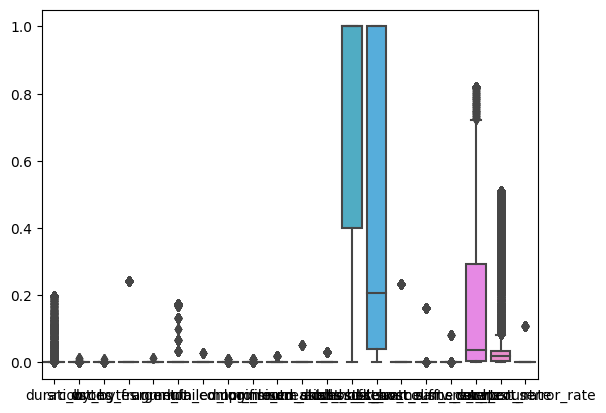

In [28]:
sns.boxplot(data=df_norm)

### Correlation Matrix

<ipython-input-29-d04de785f273>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<Axes: >

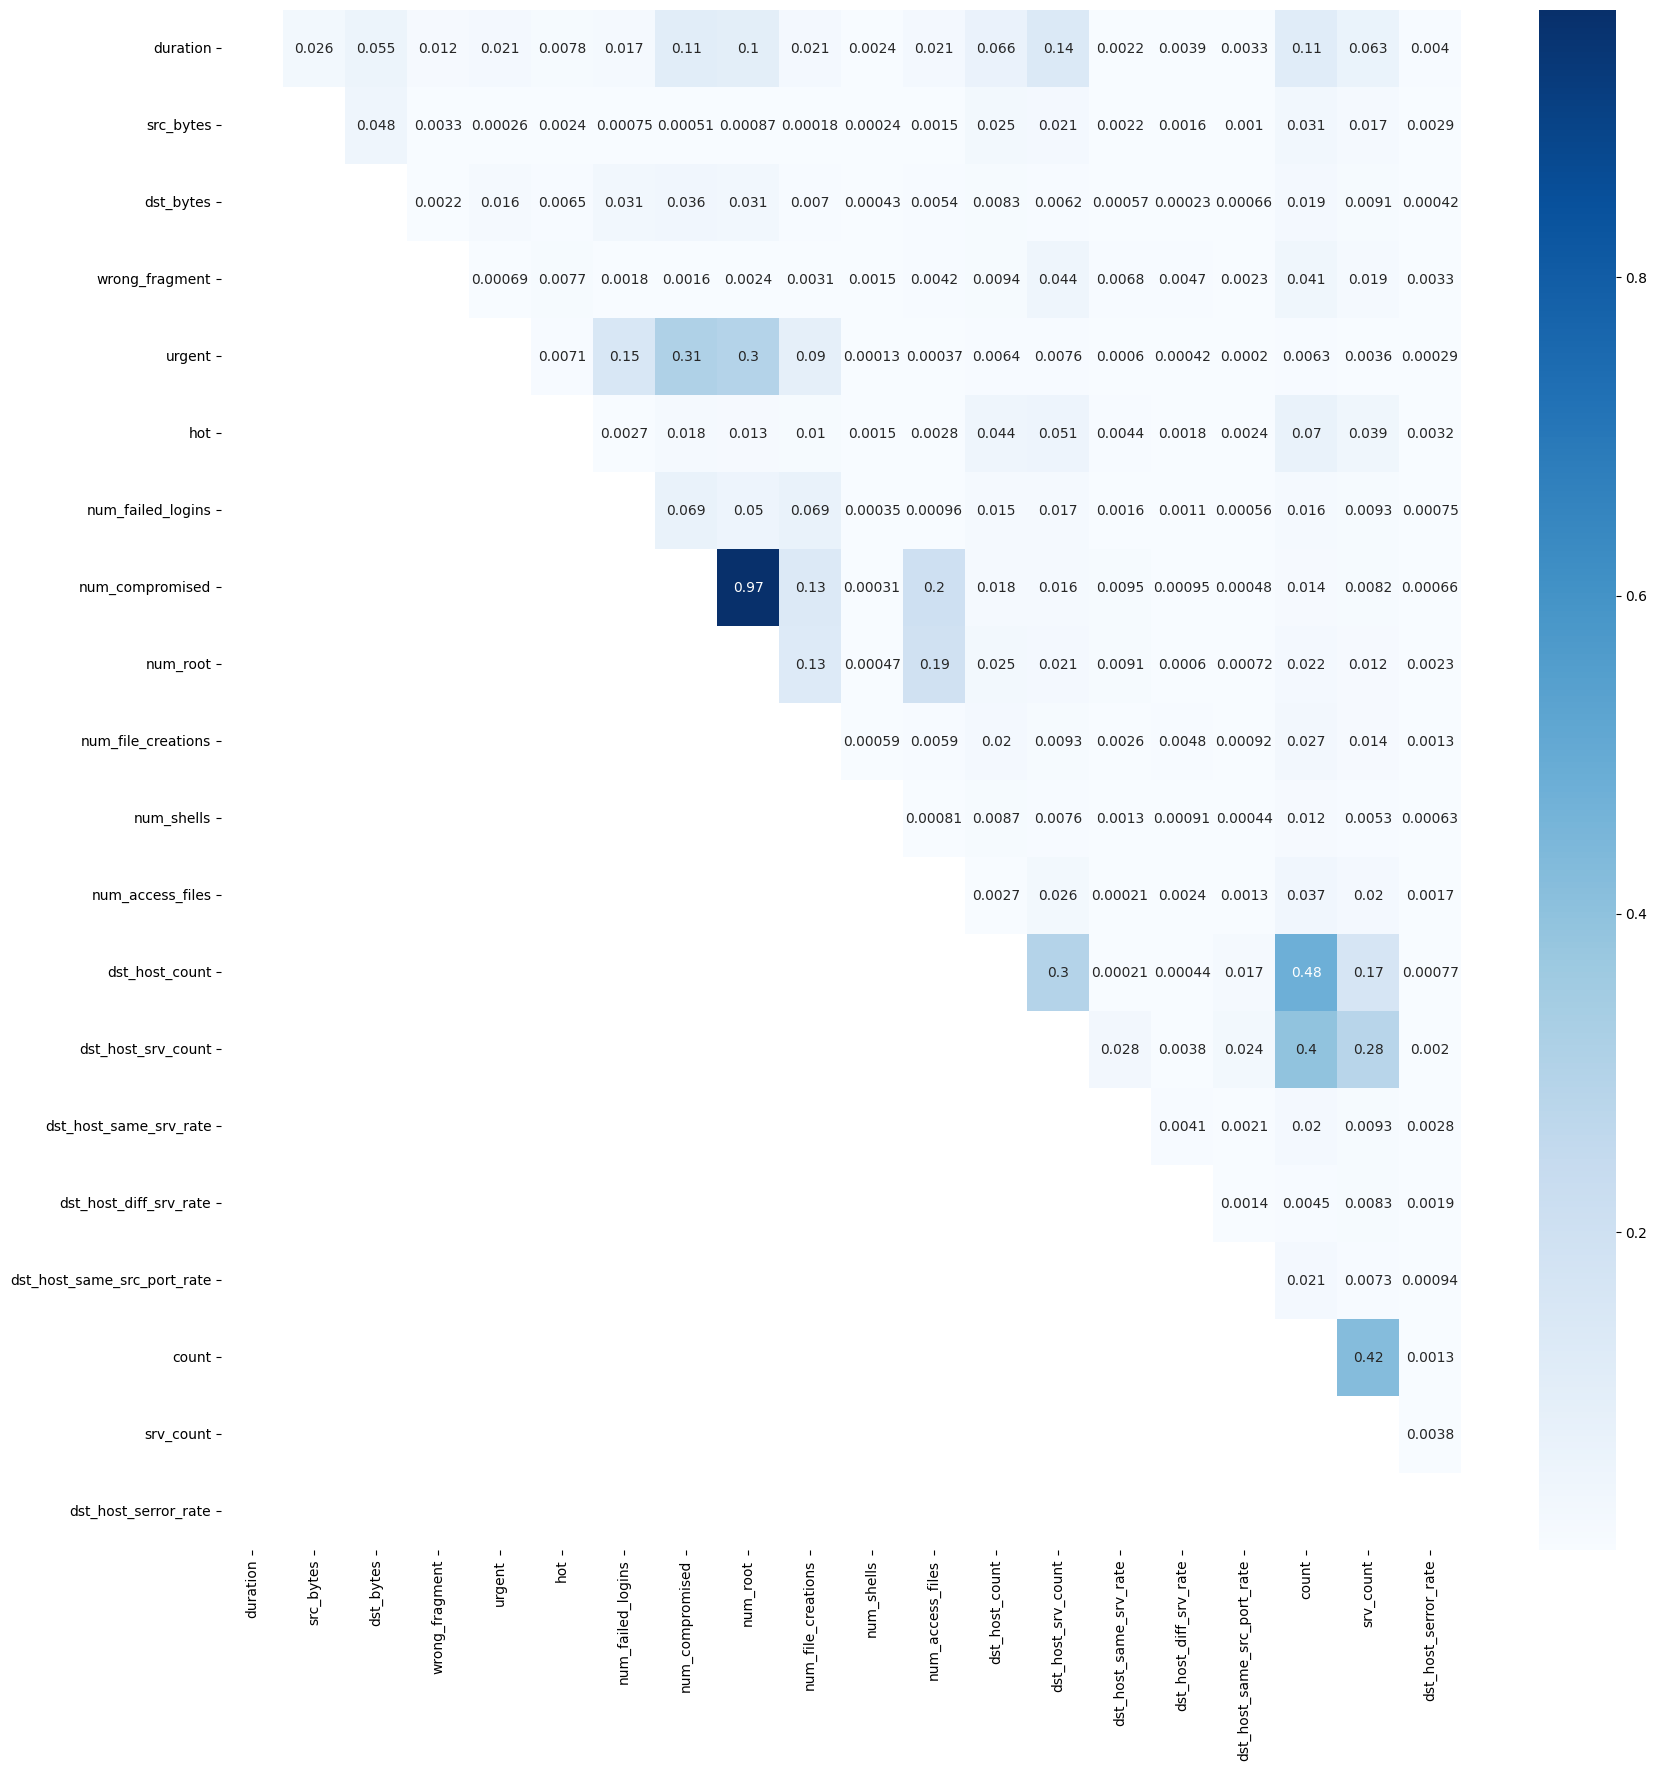

In [29]:
corr_matrix = df_norm.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
plt.figure(figsize=(20,20))
sns.heatmap(upper, annot=True, cmap='Blues')

In [30]:
# menghapus kolom num_compromised karena memiliki korelasi yang tinggi karena jika tidak dihapus dapat menyebabkan multikolinearitas
df_norm.drop(columns=['num_compromised'], inplace=True)

<ipython-input-31-d04de785f273>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<Axes: >

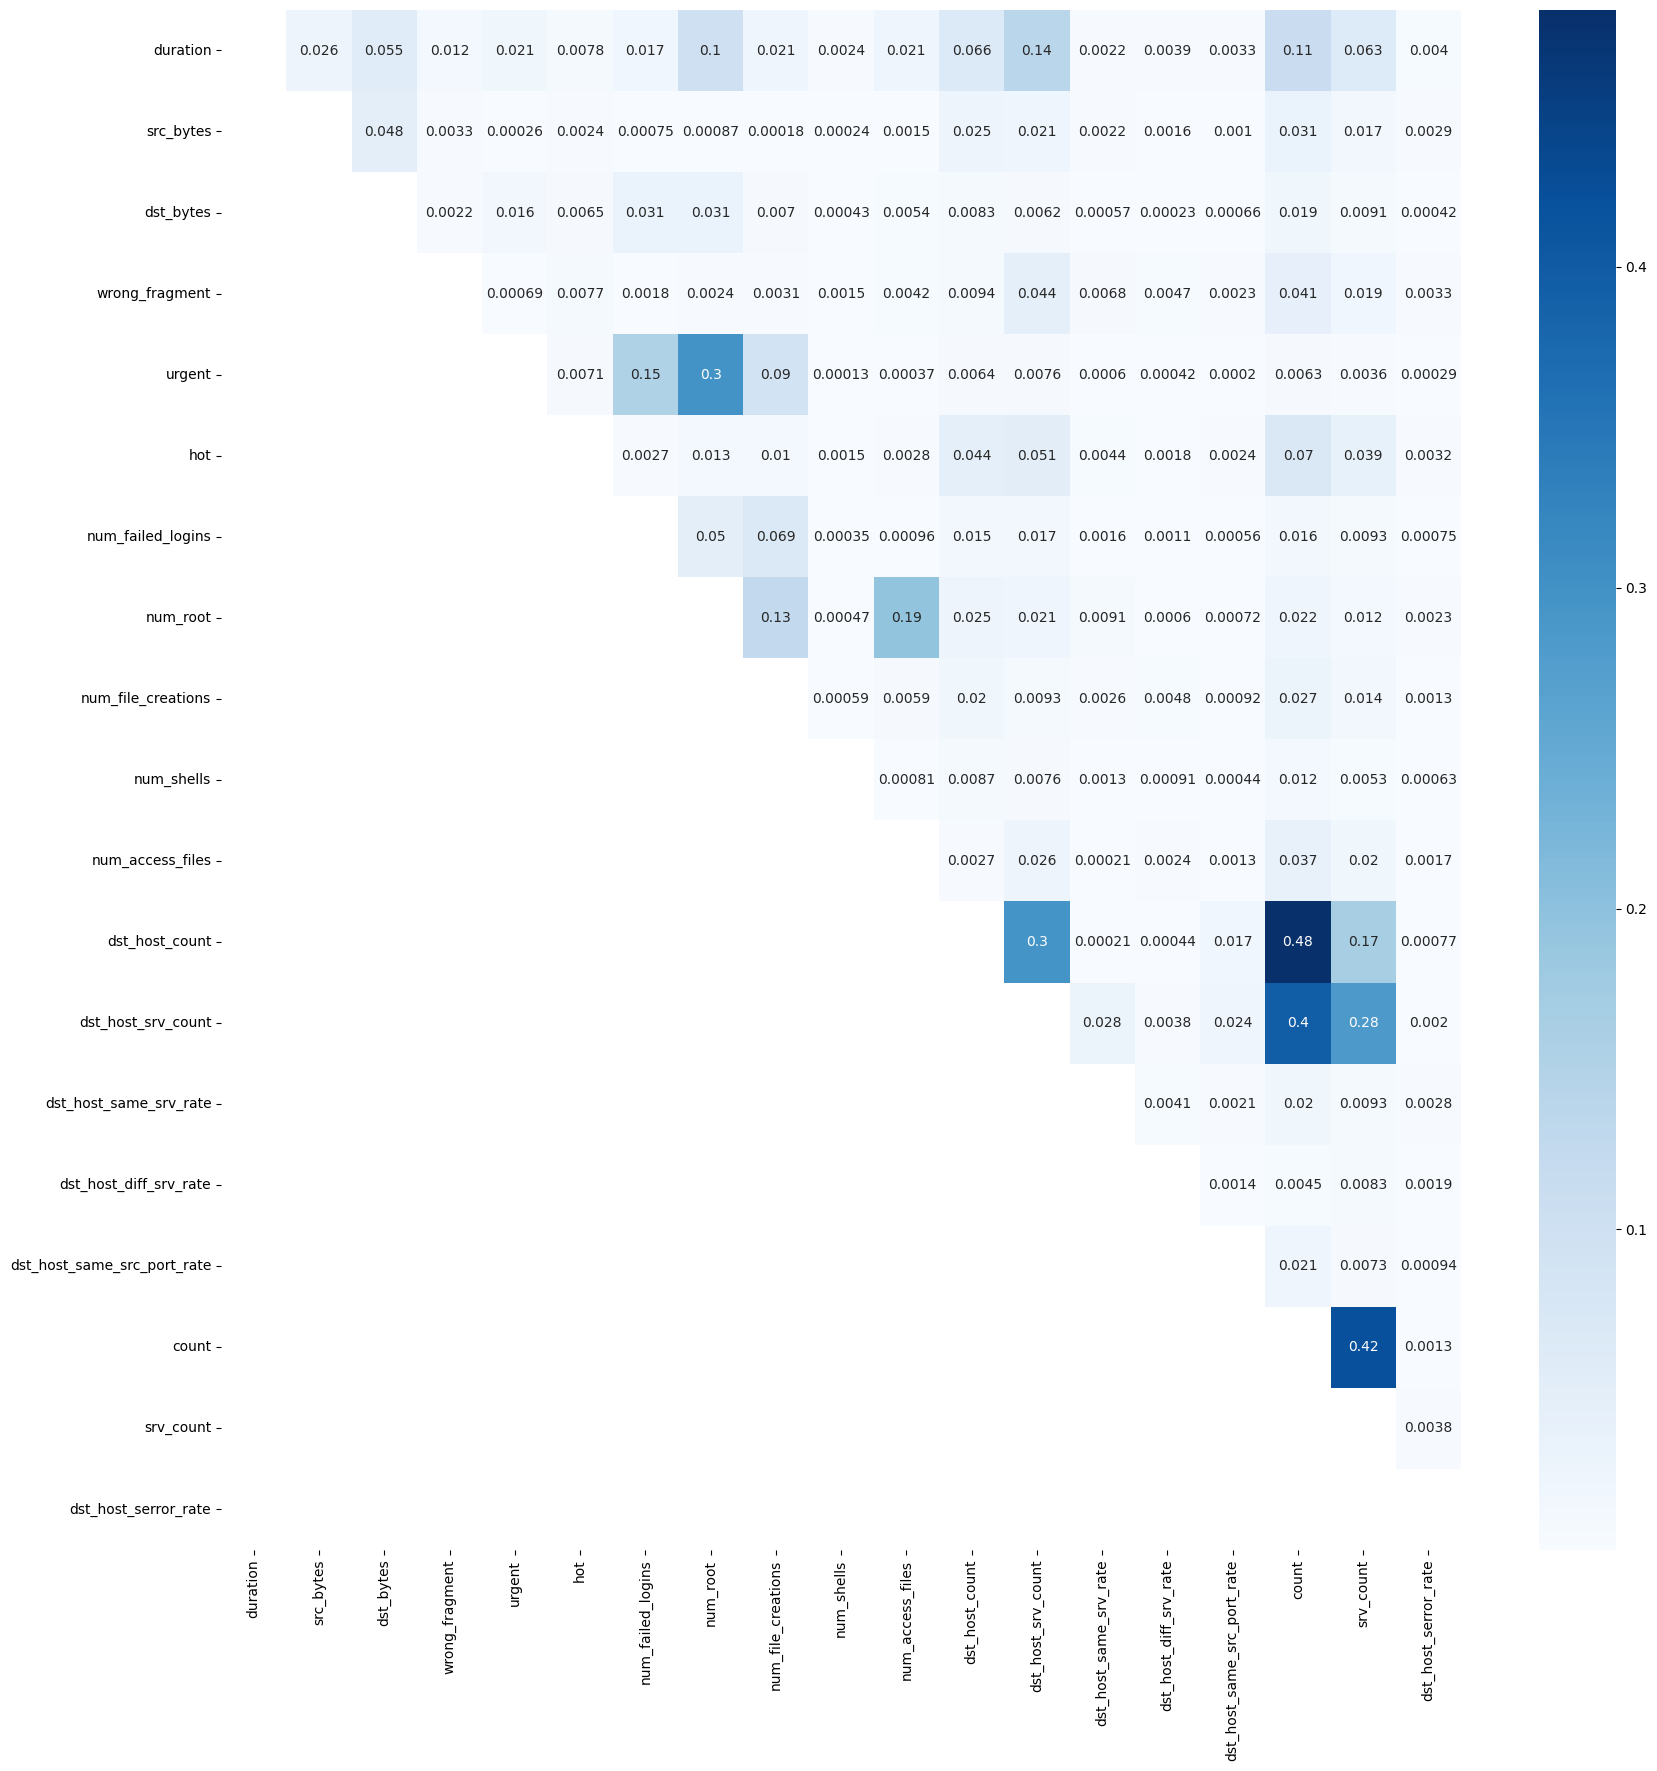

In [31]:
corr_matrix = df_norm.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
plt.figure(figsize=(20,20))
sns.heatmap(upper, annot=True, cmap='Blues')

## Transformed Data

In [32]:
df_model=pd.concat([df_onehot, df_norm, df_cat['type_of_attack']], axis=1)
df_model.head()

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land_1,logged_in_1,root_shell_1,su_attempted_1,su_attempted_2,is_guest_login_1,serror_rate_1,srv_serror_rate_1,rerror_rate_1,srv_rerror_rate_1,dst_host_srv_serror_rate_1,dst_host_srv_rerror_rate_1,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_root,num_file_creations,num_shells,num_access_files,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,count,srv_count,dst_host_serror_rate,type_of_attack
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.690196,0.003922,1.000010e-07,9.400094e-06,9.500095e-06,0.001957,0.001957,0.00001,nmap
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,2.065271e-07,2.765781e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450980,0.894118,1.000010e-05,0.000000e+00,1.000010e-07,0.027397,0.029354,0.00000,normal
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,1.681203e-07,4.458228e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023529,1.000000,1.000010e-05,0.000000e+00,1.700017e-06,0.001957,0.001957,0.00000,normal
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000023,7.826292e-07,2.496302e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.792157,0.603922,5.800058e-06,2.000020e-07,0.000000e+00,0.001957,0.003914,0.00000,normal
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.070588,7.000070e-07,5.000050e-07,0.000000e+00,0.536204,0.035225,0.00001,neptune


## Modeling Data Train

In [33]:
X = df_model.drop('type_of_attack', axis=1)
y = df_model['type_of_attack']

### Imbalance Data

<Axes: xlabel='type_of_attack', ylabel='count'>

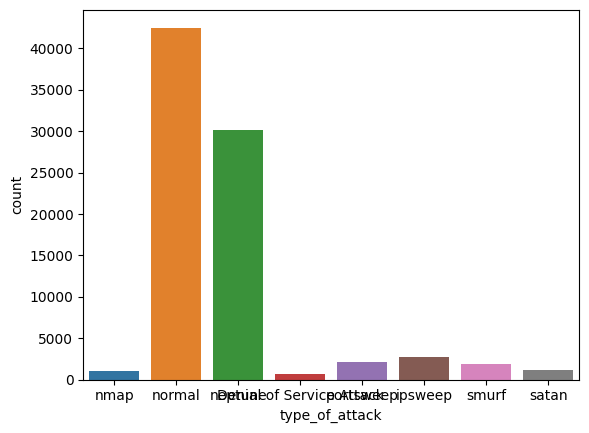

In [34]:
sns.countplot(x='type_of_attack', data=df_model)

In [35]:
X_res, y_res = SMOTE().fit_resample (X, y)
y_res.value_counts()

nmap                        42517
normal                      42517
neptune                     42517
Denial of Service Attack    42517
portsweep                   42517
ipsweep                     42517
smurf                       42517
satan                       42517
Name: type_of_attack, dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=123)
print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase unique di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase unique di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (272108, 108) , sedangkan Jumlah baris dan kolom dari y_train adalah: (272108,)
Prosentase unique di data Training adalah:
nmap                        0.125417
Denial of Service Attack    0.125266
satan                       0.125219
smurf                       0.124991
portsweep                   0.124983
normal                      0.124969
ipsweep                     0.124825
neptune                     0.124329
Name: type_of_attack, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (68028, 108) , sedangkan Jumlah baris dan kolom dari y_test adalah: (68028,)
Prosentase unique di data Testing adalah:
neptune                     0.127683
ipsweep                     0.125698
normal                      0.125125
portsweep                   0.125066
smurf                       0.125037
satan                       0.124125
Denial of Service Attack    0.123934
nmap                        0.123332
Name: type_of_attack, dtype: float64


### Naive Bayes

In [37]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.6624772152643029
F1 Score: 0.6967019920369734


### Decision Tree

In [39]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

f1 = f1_score(y_pred, y_test, average="weighted")

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", f1)

Accuracy: 0.9923119891809254
F1 Score: 0.992310956634279


### Logistic Regression

In [40]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9044511083671429
F1 Score: 0.9053277391144371


### Random Forest

In [71]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.992591285941083
F1 Score: 0.9925929464117419


### SVM

In [42]:
svm_model = SVC()
# svm_model = SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9121832186746633
F1 Score: 0.9153492948057205


## Confusion Matrix of Best Model

Pemilihan Model terbaik berada pada Model **Random Forest** karena memiliki akurasi yang lebih tinggi dari model lainnya  

In [72]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9931351796319162
F1 Score: 0.9931353793029202


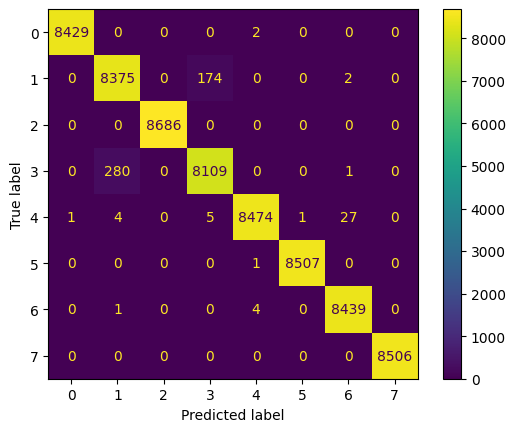

In [44]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Feature Importance

                             Feature Importance
service_ecr_i                      1.400211e-01
wrong_fragment                     1.353444e-01
dst_host_count                     1.305102e-01
flag_S0                            1.134286e-01
dst_host_srv_rerror_rate_1         1.079144e-01
service_eco_i                      9.517140e-02
service_private                    7.563793e-02
srv_count                          7.015754e-02
dst_host_srv_count                 6.405325e-02
dst_host_diff_srv_rate             1.649915e-02
count                              1.011906e-02
dst_host_same_src_port_rate        1.010671e-02
src_bytes                          1.010572e-02
flag_SH                            4.792555e-03
duration                           2.981336e-03
dst_host_srv_serror_rate_1         2.616794e-03
dst_host_same_srv_rate             1.875834e-03
service_http                       1.729455e-03
dst_host_serror_rate               1.614203e-03
service_other                      1.416

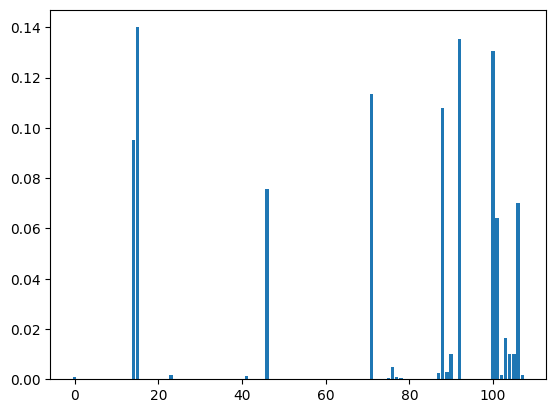

In [78]:
importance = clf.feature_importances_

# Membuat DataFrame dengan nama kolom dari X_train
df_importance = pd.DataFrame({'Feature Importance': importance}, index=X_train.columns)

# Menyortir DataFrame berdasarkan Feature Importance
df_importance_sorted = df_importance.sort_values(by='Feature Importance', ascending=False)

# Menampilkan DataFrame dengan nama fitur
pd.set_option('display.max_rows', None)
print(df_importance_sorted)

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Data Prediction

In [45]:
df_test=pd.read_csv("/content/drive/MyDrive/Data_Prediction.csv", sep=';')

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12479 entries, 0 to 12478
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           12479 non-null  int64  
 1   duration                     12479 non-null  int64  
 2   protocol_type                12479 non-null  object 
 3   service                      12479 non-null  object 
 4   flag                         12479 non-null  object 
 5   src_bytes                    12479 non-null  int64  
 6   dst_bytes                    12479 non-null  int64  
 7   land                         12479 non-null  int64  
 8   wrong_fragment               12479 non-null  int64  
 9   urgent                       12479 non-null  int64  
 10  hot                          12479 non-null  int64  
 11  num_failed_logins            12479 non-null  int64  
 12  logged_in                    12479 non-null  int64  
 13  num_compromised 

In [47]:
df_test=df_test.drop(columns=['id', 'num_outbound_cmds', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                              'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'num_compromised'], axis=1)
df_test.shape

(12479, 34)

In [48]:
df_num_test=df_test[['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
                     'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
                     'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                     'dst_host_same_src_port_rate', 'count', 'srv_count', 'dst_host_serror_rate']]
df_cat_test=df_test.drop(df_num_test, axis=1)

### One-Hot Encoding Data Test

In [49]:
df_cat_test

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate
0,tcp,smtp,SF,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,udp,other,SF,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,icmp,ecr_i,SF,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,icmp,eco_i,SF,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,udp,domain_u,SF,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,tcp,http,SF,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
12475,tcp,private,RSTR,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,1.0
12476,tcp,smtp,SF,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
12477,icmp,eco_i,SF,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# memisahkan beberapa kolom yang akan dijadikan tipe int lalu string
df_cat_test1=df_cat_test[['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
                         'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']].astype(int)
df_cat_test2=df_cat_test.drop(df_cat_test1, axis=1)

In [51]:
# mengubah tipe data ke string semua
df_cat_test=pd.concat([df_cat_test2, df_cat_test1], axis=1)
df_cat_test=df_cat_test.astype(str)
df_cat_test

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate
0,tcp,smtp,SF,0,1,0,0,0,0,0,0,0,0,0,0
1,udp,other,SF,0,0,0,0,0,0,0,0,0,0,0,0
2,icmp,ecr_i,SF,0,0,0,0,0,0,0,0,0,0,0,0
3,icmp,eco_i,SF,0,0,0,0,0,0,0,0,0,0,0,0
4,udp,domain_u,SF,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,tcp,http,SF,0,1,0,0,0,0,0,0,0,0,0,0
12475,tcp,private,RSTR,0,0,0,0,0,0,0,0,1,1,0,1
12476,tcp,smtp,SF,0,1,0,0,0,0,0,0,0,0,0,0
12477,icmp,eco_i,SF,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
df_onehot_test=pd.get_dummies(df_cat_test, drop_first=True)
df_onehot_test=df_onehot_test.replace({False:0, True:1})
df_onehot_test

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land_1,logged_in_1,root_shell_1,su_attempted_1,su_attempted_2,is_guest_login_1,serror_rate_1,srv_serror_rate_1,rerror_rate_1,srv_rerror_rate_1,dst_host_srv_serror_rate_1,dst_host_srv_rerror_rate_1
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
12475,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
12476,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
12477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# menambahkan kolom yang sama dengan data train
df_onehot_test.insert(43, 'service_pm_dump', 0)

In [54]:
df_onehot_test.insert(59, 'service_tftp_u', 0)

In [55]:
df_onehot_test.insert(60, 'service_tim_i', 0)

In [56]:
df_onehot_test.insert(62, 'service_urh_i', 0)

In [57]:
df_onehot_test

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land_1,logged_in_1,root_shell_1,su_attempted_1,su_attempted_2,is_guest_login_1,serror_rate_1,srv_serror_rate_1,rerror_rate_1,srv_rerror_rate_1,dst_host_srv_serror_rate_1,dst_host_srv_rerror_rate_1
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
12475,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
12476,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
12477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Normalized Data Test

In [58]:
scaler = MinMaxScaler()
df_norm_test=scaler.fit_transform(df_num_test)
df_norm_test=pd.DataFrame(df_norm_test, columns=df_num_test.columns)

In [59]:
df_norm_test

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_root,num_file_creations,num_shells,num_access_files,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,count,srv_count,dst_host_serror_rate
0,0.000024,2.053071e-06,0.000064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700787,0.712598,0.68,0.02,0.01,0.001957,0.003914,0.0
1,0.023299,1.241949e-07,0.000020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.00,0.64,0.94,0.001957,0.001957,0.0
2,0.000000,8.839253e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.086614,0.09,0.02,0.09,0.045010,0.045010,0.0
3,0.000000,6.852134e-09,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.330709,1.00,0.00,1.00,0.001957,0.029354,0.0
4,0.000000,3.768674e-08,0.000026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.980315,0.393701,0.40,0.01,0.38,0.001957,0.001957,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,0.000000,2.740854e-07,0.000326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.496063,1.000000,1.00,0.00,0.01,0.011742,0.011742,0.0
12475,0.503860,8.565167e-10,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.003937,0.01,0.69,1.00,0.003914,0.003914,0.0
12476,0.000024,6.363919e-07,0.000072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019685,0.811024,1.00,0.00,0.17,0.001957,0.007828,0.0
12477,0.000000,6.852134e-09,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011811,0.657480,1.00,0.00,1.00,0.001957,0.068493,0.0


### Transformed Data Test

In [60]:
df_model_test=pd.concat([df_onehot_test, df_norm_test], axis=1)
df_model_test

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land_1,logged_in_1,root_shell_1,su_attempted_1,su_attempted_2,is_guest_login_1,serror_rate_1,srv_serror_rate_1,rerror_rate_1,srv_rerror_rate_1,dst_host_srv_serror_rate_1,dst_host_srv_rerror_rate_1,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_root,num_file_creations,num_shells,num_access_files,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,count,srv_count,dst_host_serror_rate
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000024,2.053071e-06,0.000064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700787,0.712598,0.68,0.02,0.01,0.001957,0.003914,0.0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.023299,1.241949e-07,0.000020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.00,0.64,0.94,0.001957,0.001957,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,8.839253e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.086614,0.09,0.02,0.09,0.045010,0.045010,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,6.852134e-09,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.330709,1.00,0.00,1.00,0.001957,0.029354,0.0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,3.768674e-08,0.000026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.980315,0.393701,0.40,0.01,0.38,0.001957,0.001957,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,2.740854e-07,0.000326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.496063,1.000000,1.00,0.00,0.01,0.011742,0.011742,0.0
12475,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0.5

## Data Train

In [61]:
df_train=df_model

In [62]:
df_train.insert(22, 'service_harvest', 0)

In [63]:
df_train

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land_1,logged_in_1,root_shell_1,su_attempted_1,su_attempted_2,is_guest_login_1,serror_rate_1,srv_serror_rate_1,rerror_rate_1,srv_rerror_rate_1,dst_host_srv_serror_rate_1,dst_host_srv_rerror_rate_1,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_root,num_file_creations,num_shells,num_access_files,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,count,srv_count,dst_host_serror_rate,type_of_attack
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.690196,0.003922,1.000010e-07,9.400094e-06,9.500095e-06,0.001957,0.001957,0.00001,nmap
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,2.065271e-07,2.765781e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450980,0.894118,1.000010e-05,0.000000e+00,1.000010e-07,0.027397,0.029354,0.00000,normal
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,1.681203e-07,4.458228e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023529,1.000000,1.000010e-05,0.000000e+00,1.700017e-06,0.001957,0.001957,0.00000,normal
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000023,7.826292e-07,2.496302e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.792157,0.603922,5.800058e-06,2.000020e-07,0.000000e+00,0.001957,0.003914,0.00000,normal
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.070588,7.000070e-07,5.000050e-07,0.000000e+00,0.536204,0.035225,0.00001,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82198,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,2.550791e-07,5.817072e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843,1.000000,1.000010e

## Modeling Data Train and Data Test

In [64]:
# menentukan X_train, y_train, dan X_test
X_train=df_train.drop('type_of_attack', axis=1)
y_train=df_train['type_of_attack']
X_test=df_model_test

Dengan menggunakan model terbaik yang telah dilakukan pada data train sebelumnya, yaitu model **Random Forest** maka untuk memprediksi data test sebagai berikut

In [65]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

df_model_test['type_of_attack']=y_pred

In [66]:
df_model_test

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,land_1,logged_in_1,root_shell_1,su_attempted_1,su_attempted_2,is_guest_login_1,serror_rate_1,srv_serror_rate_1,rerror_rate_1,srv_rerror_rate_1,dst_host_srv_serror_rate_1,dst_host_srv_rerror_rate_1,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_root,num_file_creations,num_shells,num_access_files,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,count,srv_count,dst_host_serror_rate,type_of_attack
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000024,2.053071e-06,0.000064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700787,0.712598,0.68,0.02,0.01,0.001957,0.003914,0.0,normal
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.023299,1.241949e-07,0.000020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.00,0.64,0.94,0.001957,0.001957,0.0,normal
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,8.839253e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.086614,0.09,0.02,0.09,0.045010,0.045010,0.0,smurf
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,6.852134e-09,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.330709,1.00,0.00,1.00,0.001957,0.029354,0.0,ipsweep
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,3.768674e-08,0.000026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.980315,0.393701,0.40,0.01,0.38,0.001957,0.001957,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,2.740854e-07,0.000326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.496063,1.000000,1.00,0.00,0.01,0.011742,0.011742,0.0,normal
12475,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [68]:
# export
df_model_test.to_csv('/content/drive/My Drive/df_model_test.csv', index=False)